In [1]:
%matplotlib inline

# CNN text

In [2]:
import keras
import tensorflow as tf

Using TensorFlow backend.


In [3]:
from keras.layers import Conv1D, MaxPooling1D
from keras.layers import Dense, Flatten, Dropout
from keras.models import Sequential
from keras.optimizers import Adam
from keras.regularizers import l2
from keras.utils.np_utils import to_categorical

## Globals setup

In [4]:
DATA_PATH = '/data/fashion/txt/fashion.dedup.txt'
GLOVE_6B_PATH = '/data/glove.6B.vocab'
GLOVE_840B_PATH = '/data/glove.840B.vocab'

## Word-CNN

## Char-CNN

In [5]:
with open(DATA_PATH, 'rt') as f:
    classes, texts =  zip(*[line.split(" ", 1) for line in f.readlines()])
    classes = [cls[9:] for cls in classes]

# Dataset

In [6]:
classes[:5]

['keychains', 'trousers', 'high-top-sneakers', 'trousers', 'jeans']

In [7]:
texts[:5]

('Fox fur keychain striped in tones of red, pink, and beige. Spring-ring fastening and logo disc on black calfskin lanyard. Silver-tone hardware. Tonal stitching. Approx. 4" diameter. Fox fur, Calfskin. Made in Italy.\n',
 'Wide-leg twill trousers in black. Two-pocket styling. Cropped leg. Zip-fly. Unlined. Tonal stitching. Body: 96% viscose, 6% elastane. Lining: 96% cupro, 4% elastane. Made in Italy.\n',
 'High-top grained leather sneakers in black. Round toe. Tonal lace-up closure. Leather lining in brown. Rubber sole in white. Tonal stitching. Upper: leather. Sole: rubber. Made in Japan.\n',
 'Straight-leg cotton gabardine trousers in white. Buttoned detailing at waistband. Four-pocket styling. Pleats at front. Zip-fly. Partially lined. Tonal stitching. 100% cotton. Made in Japan.\n',
 'Slim-fit unwashed denim jeans in \'faded\' indigo. Mid-rise. Fading and whiskering throughout. Five-pocket styling. Suede logo patch in blue at back waistband. Zip-fly. Silver and gold-tone hardware.

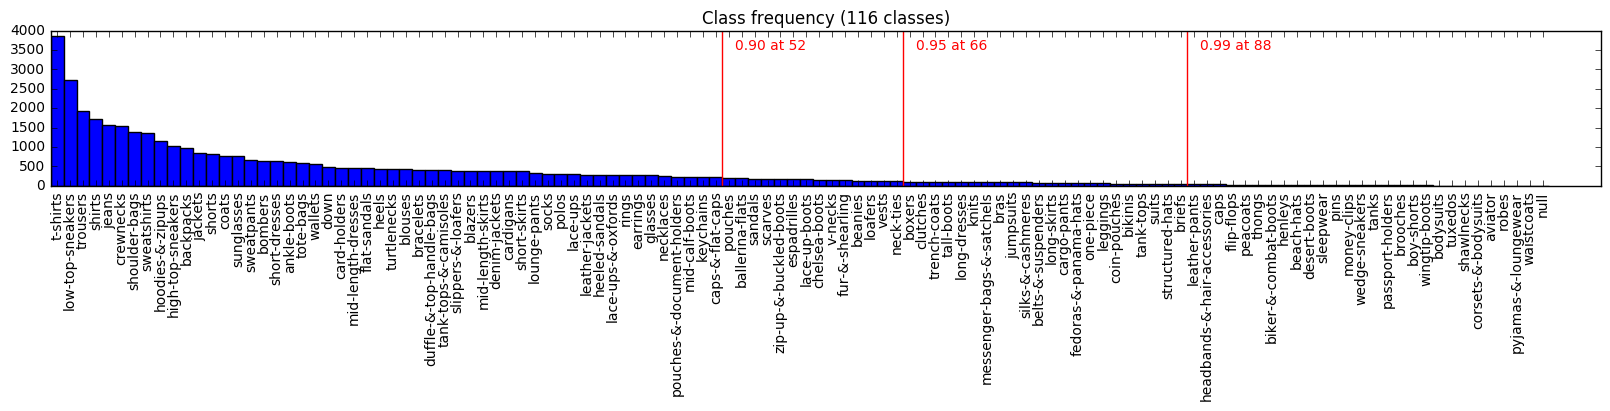

In [8]:
import numpy as np
import matplotlib.pyplot as plt

from collections import Counter


labels, values = zip(*Counter(classes).most_common())

# get the EDF
perc = [0.9, 0.95, 0.99]
cumsum = np.cumsum(values) / float(np.sum(values))
idxs = [np.argmax(cumsum >= idx) for idx in perc]

indexes = np.arange(len(labels))
width = 1

plt.figure(figsize=(20, 2))
plt.title("Class frequency (%i classes)" % len(values))
plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)
plt.xticks(rotation=90)
for idx, text in zip(idxs, perc):
    plt.axvline(x=idx, color='r')
    plt.text(idx+1, 3500, "%0.2f at %i" % (text, idx) , color='r')
plt.show()

## Tokens (GloVe comparision)

In [9]:
import string 
import itertools

BLACK_LIST = string.punctuation.replace('%', '').replace('-','') + '\n'

def normalize(text, black_list = BLACK_LIST, vocab=None, lowercase =  True, tokenize = False):
    if black_list:
        text = text.translate(None, BLACK_LIST)
    if lowercase:
        text = text.lower()
    if vocab:
        text = ' '.join([word for word in text.split() if word in vocab])
    if tokenize:
        return text.split()
    return text

In [11]:
vocab_fasion = Counter(itertools.chain(*[normalize(text, tokenize=True) for text in texts]))
top_words = [k for k,v in vocab_fasion.most_common()]

In [12]:
print("There are %i elements in the dataset" % len(vocab_fasion))
vocab_fasion.most_common(10)

There are 7276 elements in the dataset


[('in', 95756),
 ('at', 79354),
 ('tonal', 46444),
 ('stitching', 37615),
 ('and', 34032),
 ('black', 29607),
 ('leather', 28539),
 ('cotton', 24742),
 ('made', 24687),
 ('100%', 20331)]

In [13]:
with open(GLOVE_6B_PATH, 'rt') as f:
    vocab_6b = set([line[:-1] for line in f.readlines()])

In [14]:
with open(GLOVE_840B_PATH, 'rt') as f:
    vocab_840b = set([line[:-1] for line in f.readlines()])

In [15]:
missing_from_6B = Counter({k: vocab_fasion[k] for k in vocab_fasion if k not in vocab_6b})
missing_from_840B = Counter({k: vocab_fasion[k] for k in vocab_fasion if k not in vocab_840b})

In [16]:
print("There are %i elements missing from 840b out of %i" % (len(missing_from_6B), len(vocab_fasion)))
for k, v in missing_from_6B.most_common(10):
    print("- %s with %i occurances, %i most common word" % (k, missing_from_6B[k], top_words.index(k)))

There are 2384 elements missing from 840b out of 7276
- 100% with 20331 occurances, 9 most common word
- silver-tone with 7420 occurances, 40 most common word
- gold-tone with 6193 occurances, 49 most common word
- elastane with 4010 occurances, 73 most common word
- lace-up with 3800 occurances, 78 most common word
- press-stud with 3024 occurances, 91 most common word
- zip-fly with 2759 occurances, 101 most common word
- low-top with 2210 occurances, 117 most common word
- slim-fit with 2070 occurances, 125 most common word
- single-button with 1803 occurances, 137 most common word


In [17]:
print("There are %i elements missing from 840b out of %i" % (len(missing_from_840B), len(vocab_fasion)))
for k, v in missing_from_840B.most_common(10):
    print("- %s with %i occurances, %i most common word" % (k, v, top_words.index(k)))

There are 1442 elements missing from 840b out of 7276
- 100% with 20331 occurances, 9 most common word
- 2% with 1704 occurances, 148 most common word
- pin-buckle with 1436 occurances, 172 most common word
- 5% with 1389 occurances, 177 most common word
- side-seams with 1195 occurances, 191 most common word
- 50% with 1119 occurances, 202 most common word
- 98% with 1072 occurances, 210 most common word
- 10% with 1051 occurances, 214 most common word
- 20% with 911 occurances, 239 most common word
- pull-loop with 869 occurances, 254 most common word
